# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# step3:
# ***#Feature Scaling***

it's recommended to use MinMaxScaler in RNN instade of standard scaler.

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# **step4:**
### Creating a data structure with 60 timesteps and 1 output

This step is one of the most important step in RNN.
we need to new varible which I use X_train and y_train and both of them are empty list in the begining.
than we need start for loop:
for loop is going to be in range of 60 upto length of the trainig_set_scaled which is 1258 we start from 60 becuase we need minumun 3 month data to predict next days and becuase in stockmarket we have 20 finantioal days so 3 times 20 day is 60 and that is why we start from 60 ( that is time t).
next step we need to append (training_set_scaled[i-60:i,0]) so we start from i-60 : i till i  becase range is between 60 t0 1258 i is going to be biger than 60 till 1285 and 0 here showes the coulumns name from our training_set_scale array which is first columns and first column in python start from 0.

we need to make our y_train [] as well 
here we use append(training_set_scaled[i,0]) which mean's tim's t+1 and time t+1 becase we start from 60 and index in python start from 0 is going to be i which is 60 and not i+1  and columns is going to be the same as x_training.

and finally we need to convert both of this list's to numpy array to be aible to use in RNN.

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

in reshapping phase : we need to use reshape method to change our 2D array to 3D arrary so first parameter is X_train.shape[0] which shows number of the observations and X_train.shape[1] which shows the number of the coulumns for x_train which is 60 and 1 show the ???? which we add it and it is our third dimention.

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

we use regressor here becuase our output values are continues.

In [9]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

NOTE: for first layer.
we import Sequential class from models modul and keras librare to add layers in our network 
so we use add() method of this class to add LSTM layer from LSTM class to our network. this layer from LSTM class takes 3 important parameters first one is units which is number of the nerouns.
and return_sequences which mean's we are going to add another layer  and most be true, 
and input_shape which need to be 2D.which corresponding to time steps and indicaters(pridector).
 
Also we use Dropout() class to prevent our model from over fitting and this class takes one important argument which is number of the NEURON our network is going to ignore in each iteration of forward and backword propogation to prevent our model from over fitting.and we use 20% which is most of the time defualt number and it's good enough.


In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [15]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In this section of the RNN we need to compile our network and to do so we need to go keras library and from optimizer section we can chose right optimizer from the list Available optimizers
SGD
RMSprop
Adam
Adadelta
Adagrad
Adamax
Nadam
Ftrl
keras recommendation for RNN is RMSprop but we are going to use Adam in this code. and for loss funnction becuase it's regression not the classification problme best one is MSE.

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [17]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 14s 138ms/step - loss: 0.1123
Epoch 2/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0078
Epoch 3/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0068
Epoch 4/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0069
Epoch 5/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0060
Epoch 7/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0056
Epoch 8/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0051
Epoch 12/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0051
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [19]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [20]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [21]:
print(predicted_stock_price)

[[801.36163]
 [798.9146 ]
 [798.23553]
 [798.79584]
 [801.0327 ]
 [805.4767 ]
 [810.2548 ]
 [813.0575 ]
 [814.1327 ]
 [814.3451 ]
 [814.2988 ]
 [814.1648 ]
 [814.0716 ]
 [814.4734 ]
 [815.2974 ]
 [818.67755]
 [824.2642 ]
 [830.78406]
 [835.2933 ]
 [833.86285]]


### Visualising the results

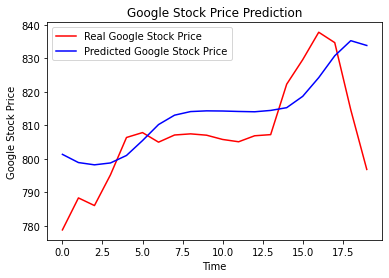

In [22]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()